In [3]:
import pandas as pd
import pickle

# text preprocessing
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

# plots and metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# feature extraction / vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline


I found a SVM emotion prediction model on Github, the model is trained on text data in 5 emotion labels: joy, sad, anger, fear, and neutral. Accuracy is 72.71%.

In [4]:
# def function for model
def preprocess_and_tokenize(data):    

    #remove html markup
    data = re.sub("(<.*?>)", "", data)

    #remove urls
    data = re.sub(r'http\S+', '', data)
    
    #remove hashtags and @names
    data= re.sub(r"(#[\d\w\.]+)", '', data)
    data= re.sub(r"(@[\d\w\.]+)", '', data)

    #remove punctuation and non-ascii digits
    data = re.sub("(\\W|\\d)", " ", data)
    
    #remove whitespace
    data = data.strip()
    
    # tokenization with nltk
    data = word_tokenize(data)
    
    # stemming with nltk
    porter = PorterStemmer()
    stem_data = [porter.stem(word) for word in data]
        
    return stem_data

In [5]:
# load emotion prediction model
import joblib
loaded_model = joblib.load('tfidf_svm.sav')

message = 'like real desk virtual desk hot mess cleaning bad boy today wish luck' 
loaded_model.predict([message])

array(['sadness'], dtype=object)

In [173]:
# load data
data = pd.read_csv('cleaned_twitter_remotework.csv').drop(columns = ['Unnamed: 0'])
data.head()

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,geo_id,retweets,...,no_stopwords_text,no_remotework_text,lematize_text,date,year,month,start,end,lockdown,enforced_order
0,389908361,JuanC611,214,12248,"I'm a #BCB, craft beer drinkin #Kaskade listen...","Oxnard, CA","Step 2, in progress...\n#wfh #wfhlife @ Riverp...",2020-12-19 02:56:54+00:00,a3c0ae863771d69e,0,...,step progress wfh wfhlife riverpark,step progress wfhlife riverpark,step progress wfhlife riverpark,2020-12-19,2020,12,2020-03-19,2021-06-15,1,1
1,38107285,orphicrose823,92,4569,“I love myself too much to waste good years on...,"San Jose, CA",Now I invest in cute onesies. #wfh https://t.c...,2020-12-18 16:42:55+00:00,a592bd6ceb1319f7,0,...,invest cute onesies wfh,invest cute onesies,invest cute onesies,2020-12-18,2020,12,2020-03-19,2021-06-15,1,1
2,214633378,alex_harmon,1097,8008,"Adventures, radio, food and good vibes. ✌ - ♎🏳‍🌈","East Bay, CA",2020 has also brought us virtual holiday parti...,2020-12-18 04:31:50+00:00,003253f0107acd32,0,...,also brought us virtual holiday parties wfh,also brought us virtual holiday parties,also brought u virtual holiday party,2020-12-18,2020,12,2020-03-19,2021-06-15,1,1
3,524864096,LauraPallin,225,666,"Art, music, city..urban beats & streets..culin...","san francisco, ca",UNMUTE YOURSELf! \n😂\n🤩\n#2020 #zoommeeting #a...,2020-12-18 01:47:28+00:00,5a110d312052166f,0,...,unmute zoommeeting allhandsondeck quarantineli...,unmute zoommeeting allhandsondeck quarantineli...,unmute zoommeeting allhandsondeck quarantineli...,2020-12-18,2020,12,2020-03-19,2021-06-15,1,1
4,1026310789068513281,MLN_Life,35,1624,Passion | Inspiration | Connection 🌻\nCo-host ...,"California, USA",I was hired remotely in June. Today is my firs...,2020-12-16 19:49:41+00:00,80eb17ffe368fc9a,0,...,hired remotely june today first day working si...,hired remotely june today first day working si...,hired remotely june today first day working si...,2020-12-16,2020,12,2020-03-19,2021-06-15,1,1


In [174]:
# labelling each tweet
data['emotion'] = loaded_model.predict(data['lematize_text'])

In [82]:
df = pd.get_dummies(data, columns = ['emotion'])
df.head()

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,geo_id,retweets,...,states_abbrev,clean_text,no_stopwords_text,no_remotework_text,lematize_text,emotion_anger,emotion_fear,emotion_joy,emotion_neutral,emotion_sadness
0,2729932651,TwelveRivers12,367,1862,We strive to raise the bar of what it means to...,"Austin, TX",#WFH but make it fashion (Twelve Rivers fashio...,2020-12-19 20:00:14+00:00,c3f37afa9efcf94b,1,...,TX,wfh but make it fashion twelve rivers fashion ...,wfh make fashion twelve rivers fashion office ...,make fashion twelve rivers fashion office big ...,make fashion twelve river fashion office big g...,0,0,0,1,0
1,389908361,JuanC611,214,12248,"I'm a #BCB, craft beer drinkin #Kaskade listen...","Oxnard, CA","Step 2, in progress...\n#wfh #wfhlife @ Riverp...",2020-12-19 02:56:54+00:00,a3c0ae863771d69e,0,...,CA,step in progress wfh wfhlife riverpark,step progress wfh wfhlife riverpark,step progress wfhlife riverpark,step progress wfhlife riverpark,0,0,0,1,0
2,737763400118198277,MissionTXperts,828,1618,Follow us on IG! @missiontxperts #FamousForExp...,"Mission, TX",Congratulations on your graduation!!! Welcome ...,2020-12-18 22:35:35+00:00,77633125ba089dcb,1,...,TX,congratulations on your graduation welcome to ...,congratulations graduation welcome missiontxpe...,congratulations graduation welcome missiontxpe...,congratulation graduation welcome missiontxper...,0,0,1,0,0
3,522212036,FitnessFoundry,2693,14002,Award Winning Personal Trainer| EMT-B 🚑 NSCA-R...,"Boston and Malden, MA",Part 2 #HomeWorkout \n\n#OldSchool Jumping Jac...,2020-12-18 19:07:33+00:00,75f5a403163f6f95,1,...,MA,part homeworkout oldschool jumping jack variat...,part homeworkout oldschool jumping jack variat...,part homeworkout oldschool jumping jack variat...,part homeworkout oldschool jumping jack variat...,0,0,0,1,0
4,1931184464,fixyourmattress,1236,17479,The only comfortable solution to SAGGING mattr...,USA,SAGGING bed❓ 🛏〰️🛏FIRM it up with MATTRESS HELP...,2020-12-18 18:46:21+00:00,7df9a00dcf914d5e,0,...,FL,sagging bed firm it up with mattress helper un...,sagging bed firm mattress helper mattress supp...,sagging bed firm mattress helper mattress supp...,sagging bed firm mattress helper mattress supp...,0,0,0,1,0


In [83]:
import datetime
df['created_at']= df['created_at'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S%z"))
df['date'] = df['created_at'].apply(lambda x: x.date())
df['year'] = df['created_at'].apply(lambda x: x.year)
df['month'] = df['created_at'].apply(lambda x: x.month)
df['tweet'] = 1

In [128]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
per = df.date.dt.to_period('M')
df_agg_m = df.groupby(per).sum()
df_agg_m['date'] = df_agg_m.index
df_agg_m = df_agg_m.reset_index(drop = True).drop(columns = ['year', 'month', 'author_id', 'author_followers', 'author_tweets'])

In [129]:
df_agg_m['joy%'] = df_agg_m['emotion_joy']/df_agg_m['tweet']
df_agg_m['neutral%'] = df_agg_m['emotion_neutral']/df_agg_m['tweet']
df_agg_m['sadness%'] = df_agg_m['emotion_sadness']/df_agg_m['tweet']
df_agg_m['anger%'] = df_agg_m['emotion_anger']/df_agg_m['tweet']
df_agg_m['fear%'] = df_agg_m['emotion_fear']/df_agg_m['tweet']

In [125]:
df_agg_m.head()

,retweets,replies,likes,quote_count,emotion_anger,emotion_fear,emotion_joy,emotion_neutral,emotion_sadness,tweet,date
0,183,38,540,17,8.0,30.0,46.0,120.0,11.0,215,2019-03
1,83,37,366,17,10.0,25.0,35.0,130.0,11.0,211,2019-04
2,56,22,213,1,14.0,24.0,45.0,112.0,5.0,200,2019-05
3,76,29,385,3,6.0,25.0,45.0,154.0,8.0,238,2019-06
4,80,67,658,8,12.0,29.0,47.0,347.0,5.0,440,2019-07


In [122]:
df1 = pd.melt(df_agg_m, id_vars = ['date'], value_vars = ['joy%', 'sadness%', 'anger%', 'fear%'])
df1

,date,variable,value
0,2019-03,joy%,0.213953
1,2019-04,joy%,0.165877
2,2019-05,joy%,0.225000
3,2019-06,joy%,0.189076
4,2019-07,joy%,0.106818
...,...,...,...
163,2022-06,fear%,0.137778
164,2022-07,fear%,0.109005
165,2022-08,fear%,0.071429
166,2022-09,fear%,0.118557


Text(0.5, 1.0, 'Monthly remote working emotion')

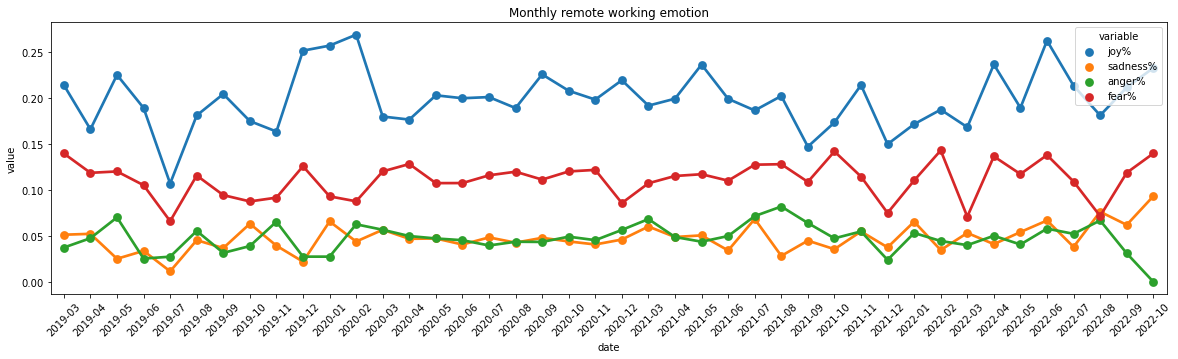

In [123]:
# plot monthly emotion%
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
sns.pointplot(x='date',y='value',data=df1, hue='variable')
plt.tick_params(axis='x', labelrotation = 45)
plt.title("Monthly remote working emotion")

Percentage of emotions are somewhat stable and did not varies a lot

In [126]:
df_agg_m = df.groupby(per).sum()
df_agg_m['date'] = df_agg_m.index
df_agg_m = df_agg_m.reset_index(drop = True).drop(columns = ['year', 'month', 'author_id', 'author_followers', 'author_tweets'])
df2 = pd.melt(df_agg_m, id_vars = ['date'], value_vars = ['emotion_joy', 'emotion_sadness', 'emotion_anger', 'emotion_fear'])
df2

,date,variable,value
0,2019-03,emotion_joy,46.0
1,2019-04,emotion_joy,35.0
2,2019-05,emotion_joy,45.0
3,2019-06,emotion_joy,45.0
4,2019-07,emotion_joy,47.0
...,...,...,...
163,2022-06,emotion_fear,31.0
164,2022-07,emotion_fear,23.0
165,2022-08,emotion_fear,15.0
166,2022-09,emotion_fear,23.0


Text(0.5, 1.0, 'Monthly remote working emotion')

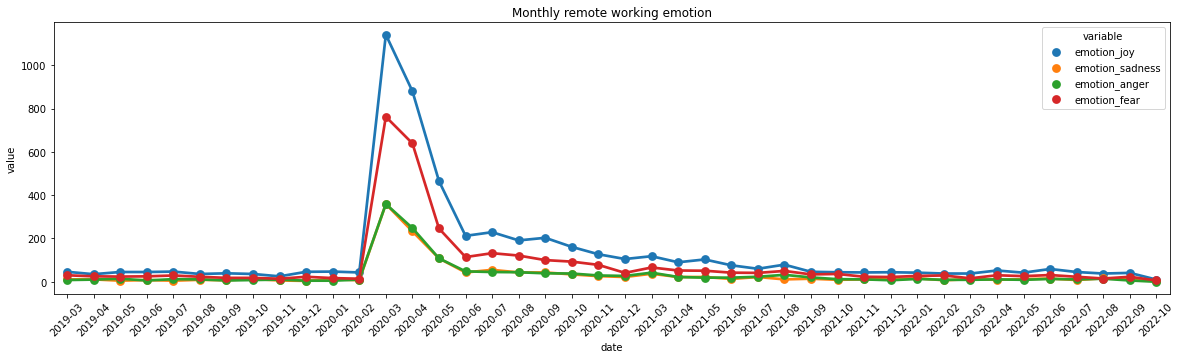

In [127]:
# plot monthly number of emotions
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
sns.pointplot(x='date',y='value',data=df2, hue='variable')
plt.tick_params(axis='x', labelrotation = 45)
plt.title("Monthly remote working emotion")

joy emotion slighly increased after lockdown, and it's hard to tell from the graph. 

In [148]:
# Let's conduct t test and compare before and after lockdown
from pandas import Timestamp
df_agg_m['timestamp'] = df_agg_m['date'].apply(lambda x: x.to_timestamp().date())
group1 = df_agg_m[df_agg_m['timestamp']<=datetime.date(2020, 3, 1)]
group2 = df_agg_m[df_agg_m['timestamp']>=datetime.date(2020, 7, 1)]

In [152]:
from scipy.stats import ttest_ind
ttest_ind(group1['joy%'], group2['joy%'])

Ttest_indResult(statistic=-0.1000915902018718, pvalue=0.920811994033946)

Turns out there is no significant difference between joy% before and after lockdown for the whole country.
Let's compare emotions in two states.

In [7]:
# filter two states
df3 = pd.read_csv('remote_work_lockdown.csv')
df3 = pd.get_dummies(df3, columns = ['emotion'])
df3['tweets'] = 1
df_ca = df3[df3['states_abbrev'] == 'CA']
df_tx = df3[df3['states_abbrev'] == 'TX']

In [8]:
# aggregate data in month
df_ca['date'] = pd.to_datetime(df_ca['date'], errors='coerce')
per = df_ca.date.dt.to_period("M")
df_agg_ca = df_ca.groupby(per).sum()
df_agg_ca['date'] = df_agg_ca.index
df_agg_ca['state'] = 'CA'
df_agg_ca = df_agg_ca.reset_index(drop = True).drop(columns = ['year', 'month', 'author_id', 'author_followers', 'author_tweets'])
df_tx['date'] = pd.to_datetime(df_tx['date'], errors='coerce')
per = df_tx.date.dt.to_period("M")
df_agg_tx = df_tx.groupby(per).sum()
df_agg_tx['date'] = df_agg_tx.index
df_agg_tx['state'] = 'TX'
df_agg_tx = df_agg_tx.reset_index(drop = True).drop(columns = ['year', 'month', 'author_id', 'author_followers', 'author_tweets'])

/var/folders/yn/83gzh79s0dv70yn_zgdzgg7m0000gn/T/ipykernel_62184/3391577175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ca['date'] = pd.to_datetime(df_ca['date'], errors='coerce')
/var/folders/yn/83gzh79s0dv70yn_zgdzgg7m0000gn/T/ipykernel_62184/3391577175.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tx['date'] = pd.to_datetime(df_tx['date'], errors='coerce')


In [9]:
# concat aggregate data
frames = [df_agg_ca, df_agg_tx]
result = pd.concat(frames).reset_index()
result['lockdown'] = result['lockdown'].apply(lambda x: 'Y' if x >0 else 'N')
result['enforced_order'] = result['enforced_order'].apply(lambda x: 'Y' if x >0 else 'N')
result

,index,Unnamed: 0,retweets,replies,likes,quote_count,lockdown,enforced_order,emotion_anger,emotion_fear,emotion_joy,emotion_neutral,emotion_sadness,tweets,date,state
0,0,67761.0,100.0,9.0,274.0,12.0,N,Y,0.0,5.0,9.0,13.0,0.0,27.0,2019-03,CA
1,1,80518.0,5.0,2.0,50.0,0.0,N,Y,0.0,3.0,4.0,20.0,2.0,29.0,2019-04,CA
2,2,67938.0,4.0,2.0,27.0,0.0,N,Y,2.0,1.0,4.0,16.0,0.0,23.0,2019-05,CA
3,3,34848.0,3.0,0.0,12.0,0.0,N,Y,2.0,1.0,1.0,9.0,0.0,13.0,2019-06,CA
4,4,83424.0,10.0,14.0,102.0,2.0,N,Y,2.0,4.0,6.0,16.0,1.0,29.0,2019-07,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,37,192102.0,39.0,9.0,208.0,3.0,N,N,0.0,2.0,3.0,14.0,2.0,21.0,2022-06,TX
80,38,136152.0,27.0,2.0,49.0,0.0,N,N,0.0,1.0,5.0,9.0,0.0,15.0,2022-07,TX
81,39,164290.0,11.0,8.0,96.0,0.0,N,N,1.0,1.0,3.0,13.0,0.0,18.0,2022-08,TX
82,40,90990.0,7.0,4.0,59.0,0.0,N,N,1.0,0.0,3.0,6.0,0.0,10.0,2022-09,TX


Text(0.5, 1.0, 'Monthly remote working tweet by state')

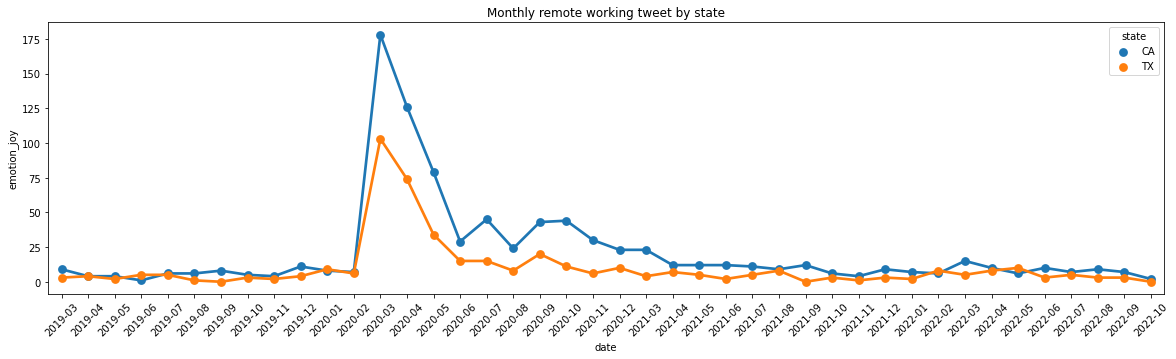

In [11]:
df_ca_tx = pd.melt(result, id_vars = ['date', 'tweets', 'lockdown', 'enforced_order', 'state'], value_vars = ['emotion_joy', 'emotion_sadness', 'emotion_anger', 'emotion_fear', 'emotion_neutral'])
import seaborn as sns
plt.figure(figsize=(20,5))
sns.pointplot(x='date',y='emotion_joy',data=result, hue='state')
plt.tick_params(axis='x', labelrotation = 45)
plt.title("Monthly remote working tweet by state")

Text(0.5, 1.0, 'Monthly remote working tweet by state')

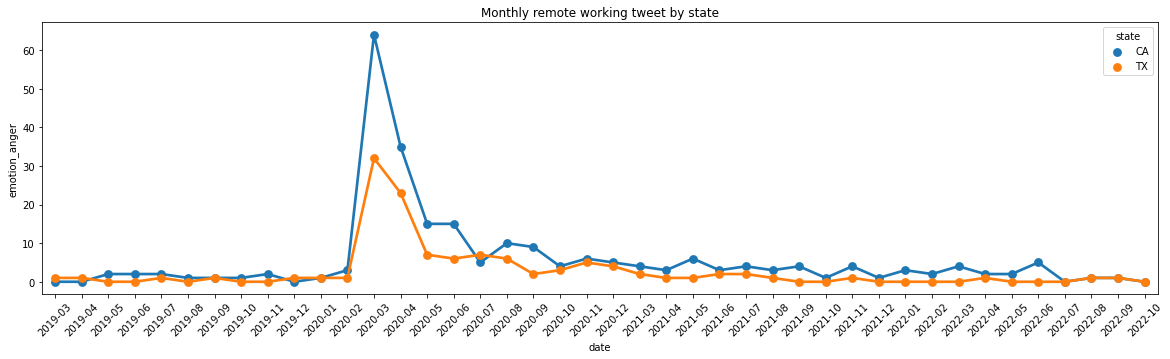

In [14]:
plt.figure(figsize=(20,5))
sns.pointplot(x='date',y='emotion_anger',data=result, hue='state')
plt.tick_params(axis='x', labelrotation = 45)
plt.title("Monthly remote working tweet by state")

In [17]:
df_ca = df3[df3['states_abbrev'] == 'NY']
df_tx = df3[df3['states_abbrev'] == 'FL']
# aggregate data in month
df_ca['date'] = pd.to_datetime(df_ca['date'], errors='coerce')
per = df_ca.date.dt.to_period("M")
df_agg_ca = df_ca.groupby(per).sum()
df_agg_ca['date'] = df_agg_ca.index
df_agg_ca['state'] = 'NY'
df_agg_ca = df_agg_ca.reset_index(drop = True).drop(columns = ['year', 'month', 'author_id', 'author_followers', 'author_tweets'])
df_tx['date'] = pd.to_datetime(df_tx['date'], errors='coerce')
per = df_tx.date.dt.to_period("M")
df_agg_tx = df_tx.groupby(per).sum()
df_agg_tx['date'] = df_agg_tx.index
df_agg_tx['state'] = 'FL'
df_agg_tx = df_agg_tx.reset_index(drop = True).drop(columns = ['year', 'month', 'author_id', 'author_followers', 'author_tweets'])
# concat aggregate data
frames = [df_agg_ca, df_agg_tx]
result = pd.concat(frames).reset_index()
result['lockdown'] = result['lockdown'].apply(lambda x: 'Y' if x >0 else 'N')
result['enforced_order'] = result['enforced_order'].apply(lambda x: 'Y' if x >0 else 'N')
result

/var/folders/yn/83gzh79s0dv70yn_zgdzgg7m0000gn/T/ipykernel_62184/1839167673.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ca['date'] = pd.to_datetime(df_ca['date'], errors='coerce')
/var/folders/yn/83gzh79s0dv70yn_zgdzgg7m0000gn/T/ipykernel_62184/1839167673.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tx['date'] = pd.to_datetime(df_tx['date'], errors='coerce')


,index,Unnamed: 0,retweets,replies,likes,quote_count,lockdown,enforced_order,emotion_anger,emotion_fear,emotion_joy,emotion_neutral,emotion_sadness,tweets,date,state
0,0,92809.0,37.0,0.0,61.0,1.0,N,Y,1.0,1.0,3.0,10.0,0.0,15.0,2019-03,NY
1,1,99212.0,21.0,0.0,61.0,0.0,N,Y,1.0,2.0,1.0,11.0,1.0,16.0,2019-04,NY
2,2,64179.0,1.0,0.0,5.0,0.0,N,Y,2.0,1.0,1.0,6.0,0.0,10.0,2019-05,NY
3,3,85479.0,14.0,4.0,45.0,0.0,N,Y,0.0,0.0,5.0,9.0,0.0,14.0,2019-06,NY
4,4,86098.0,5.0,11.0,53.0,2.0,N,Y,0.0,1.0,3.0,10.0,0.0,14.0,2019-07,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,37,144717.0,5.0,5.0,36.0,0.0,N,N,0.0,2.0,5.0,6.0,0.0,13.0,2022-06,FL
80,38,266912.0,17.0,31.0,149.0,1.0,N,N,2.0,1.0,3.0,17.0,1.0,24.0,2022-07,FL
81,39,110891.0,2.0,1.0,25.0,1.0,N,N,1.0,0.0,2.0,7.0,0.0,10.0,2022-08,FL
82,40,144279.0,10.0,6.0,70.0,0.0,N,N,0.0,1.0,2.0,9.0,1.0,13.0,2022-09,FL


Text(0.5, 1.0, 'Monthly remote working tweet by state')

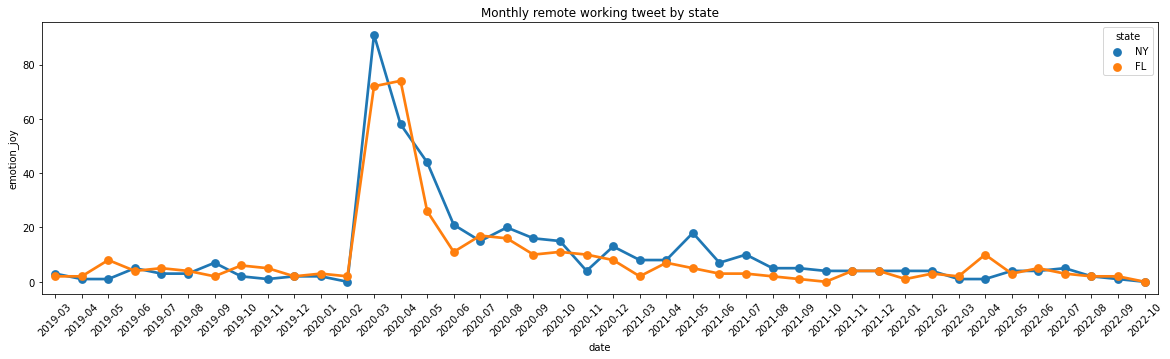

In [18]:
df_ca_tx = pd.melt(result, id_vars = ['date', 'tweets', 'lockdown', 'enforced_order', 'state'], value_vars = ['emotion_joy', 'emotion_sadness', 'emotion_anger', 'emotion_fear', 'emotion_neutral'])
import seaborn as sns
plt.figure(figsize=(20,5))
sns.pointplot(x='date',y='emotion_joy',data=result, hue='state')
plt.tick_params(axis='x', labelrotation = 45)
plt.title("Monthly remote working tweet by state")

Text(0.5, 1.0, 'Monthly remote working tweet by state')

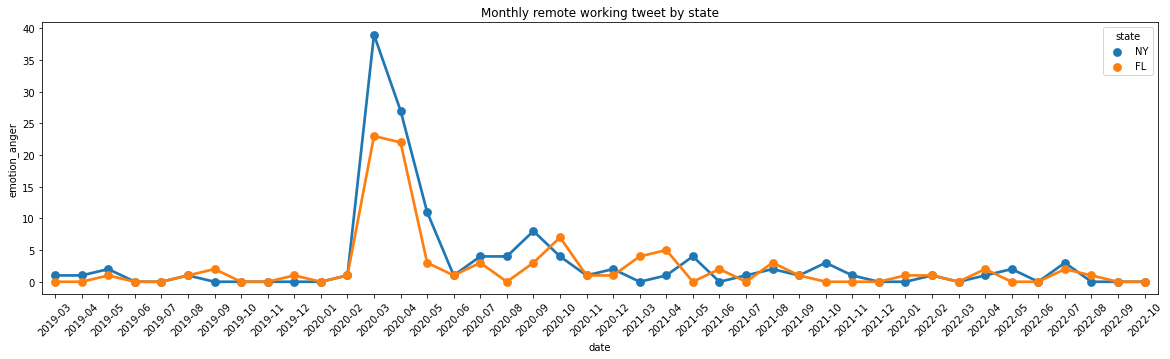

In [19]:
plt.figure(figsize=(20,5))
sns.pointplot(x='date',y='emotion_anger',data=result, hue='state')
plt.tick_params(axis='x', labelrotation = 45)
plt.title("Monthly remote working tweet by state")